#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Good Luck!

# 1. Basic Data Exploration

In [ ]:
print("Rows number:",df.shape[0])
print("Columns number:",df.shape[1])

Rows number: 148654
Columns number: 13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
# another way for finding the missing values
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

the `info()` method gives us the name of each column and its type and wheather it contains missing values or not, as we can observe that a few values of the column `BasePay` and most of the values in the `Benefits` coulmn and the whole content of the coulmn `Notes` and `Status` are missing values.

# 2. Descriptive Statistics

In [ ]:
min_sal = df['TotalPay'].min()
max_sal = df['TotalPay'].max()

In [ ]:
print('Mean:', df['TotalPay'].mean())
print('Median', df['TotalPay'].median())
print('Mode:', df['TotalPay'].mode().tolist())
print('Minimum Salary:', min_sal)
print('Maximum Salary:', max_sal)
print('Salary Range:['+ str(min_sal) +' , '+ str(max_sal) +']')
print('Standard Deviation:', df['TotalPay'].std())

Mean: 74768.32197169267
Median 71426.60999999999
Mode: [0.0]
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range:[-618.13 , 567595.43]
Standard Deviation: 50517.00527394987


# 3. Data Cleaning

In [ ]:
df.drop(columns=['Notes', 'Status'], inplace=True)
df.dropna(subset=['OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'], inplace=True)
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['Benefits'].fillna(df['TotalPayBenefits'] - df['TotalPay'], inplace=True)

- Since the Whole values of the columns `Notes`, `Status` are NaN we can drop these two columns.

- Since the number of missing values in the columns `OvertimePay`, `OtherPay`, `TotalPay`, `TotalPayBenefits`, `Year`, `Agency` is relatively small droping them won't have a big affect on the data.

- Since the column `BasePay` contains some missing values we well replace them with the mean value.

- Since the `Benefits` column has a significant amount of missing values and the relationship between this column and the `TotalPay`, `TotalPayBenefits` is:
`Benefits = TotalPayBenefits - TotalPay` so we will fill the missing values with this formula.

In [ ]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# 4. Basic Data Visualization

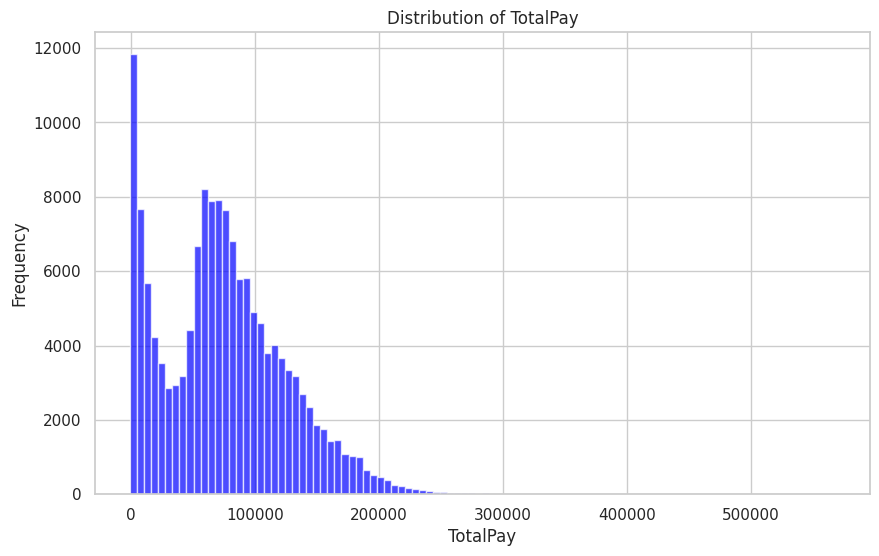

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=100, color='blue', alpha=0.7)
plt.title('Distribution of TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

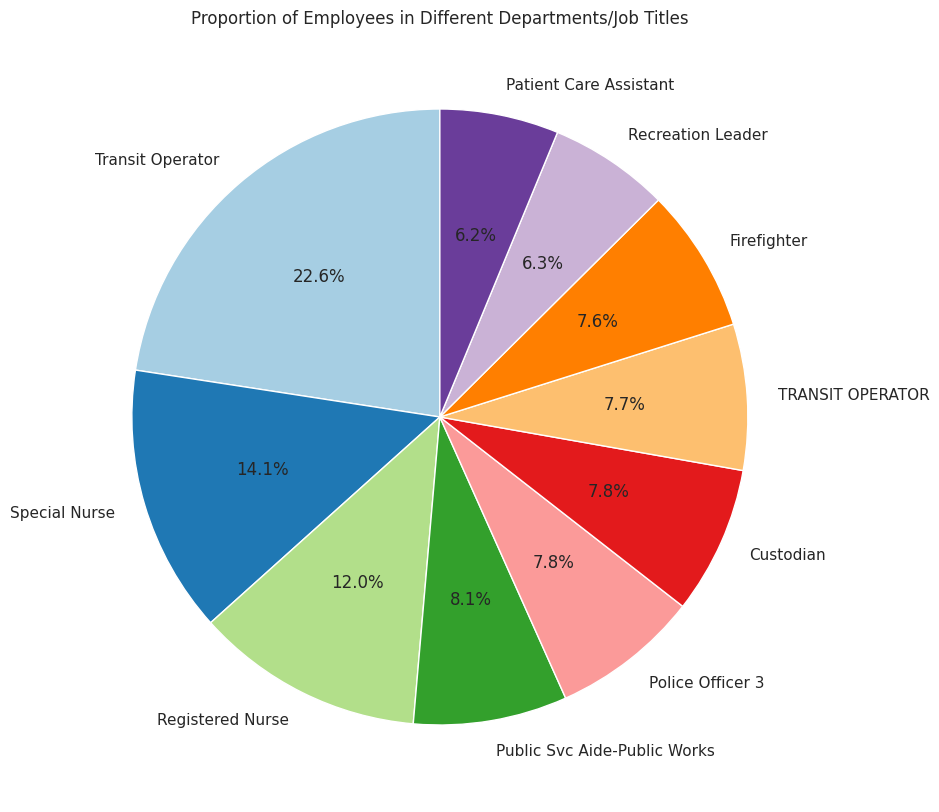

In [ ]:
# Since the JobTitle column Has so many values
# plotting the pie chart for these whole values may not be readable
# so we will plot the largest 10 department

department_counts = df['JobTitle'].value_counts().nlargest(10)

plt.figure(figsize=(10, 10))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Employees in Different Departments/Job Titles')
plt.show()

# 5. Grouped Analysis

In [ ]:
grouped_data = df.groupby(['Agency', 'Year'])

summary_statistics = grouped_data.agg({
    'BasePay': 'mean',
    'OvertimePay': 'mean',
    'TotalPay': 'mean',
    'TotalPayBenefits': 'mean'
}).reset_index()

summary_statistics

,Agency,Year,BasePay,OvertimePay,TotalPay,TotalPayBenefits
0,San Francisco,2011,63595.956517,4531.065429,71744.103871,71744.103871
1,San Francisco,2012,65436.406857,5023.417824,74113.262265,100553.229232
2,San Francisco,2013,69576.866579,5281.641980,77611.443142,101440.519714
3,San Francisco,2014,66564.421924,5401.993737,75471.836912,100261.438668


# 6. Simple Correlation Analysis

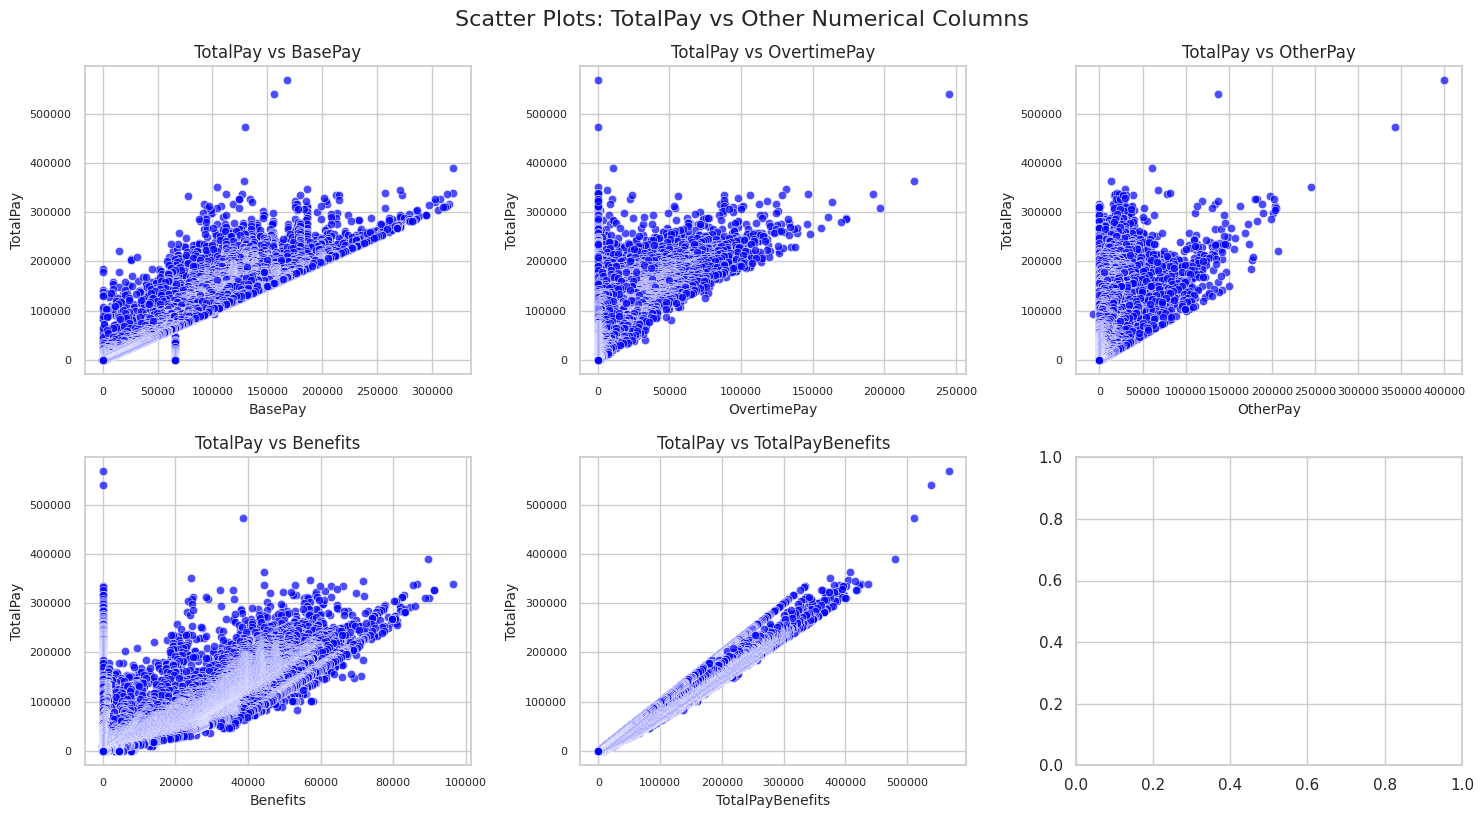

In [ ]:
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']
sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df, x=column, y='TotalPay', alpha=0.7, ax=axes[row, col], color='blue')
    axes[row, col].set_title(f'TotalPay vs {column}', fontsize=12)
    axes[row, col].set_xlabel(column, fontsize=10)
    axes[row, col].set_ylabel('TotalPay', fontsize=10)
    axes[row, col].tick_params(axis='both', labelsize=8)


plt.tight_layout()
plt.suptitle('Scatter Plots: TotalPay vs Other Numerical Columns', fontsize=16, y=1.02)
plt.show()

# 7. Summary of Insights


- The dataset consists of *`148,654`* entries and *`13`* columns, with varying data types, Missing values were observed in **'BasePay'**, **'OvertimePay'**, **'OtherPay'**, **'Benefits'**, **'Notes'** and **'Status'** columns.

- The mean total compensation is approximately `$74,768`, with a median of `$71,427`, The dataset contains outliers, with a minimum salary of `-$618.13` and a maximum of `$567,595.43`. The standard deviation is approximately `$50,517`.

- Columns **'Notes'** and **'Status'** were dropped due to having no useful information, Missing values in key columns were addressed, with **'BasePay'** imputed using the mean and 'Benefits' filled with the difference between **'TotalPayBenefits'** and **'TotalPay'**.

- A histogram was used to visualize the distribution of **'TotalPay'**, and a pie chart displayed the proportion of employees in the top **`10`** departments or job titles.

- The data was grouped by **'Agency'** and **'Year'**, and summary statistics were calculated for **'BasePay'**, **'OvertimePay'**, **'TotalPay'**, and **'TotalPayBenefits'**, and the observations are:
  - There is a noticeable increase in the average **'BasePay'** from 2011 to 2013 (where the highest average **'BasePay'** is observed), followed by a slight decrease in 2014.
  - **'OvertimePay'** shows some variation over the years, with a slight increase from 2011 to 2013 and a slight decrease in 2014.
  - **'TotalPay'** and **'TotalPayBenefits'** exhibit a consistent upward trend from 2011 to 2014.
  
- The scatter plots indicate a rising trend from the bottom right to the upper left suggests a positive correlation between 'TotalPay' and the other numerical columns.